<a href="https://www.kaggle.com/code/ahmadsoliman94/heart-disease-prediction-rf-93?scriptVersionId=96036372" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv


In [37]:
os.chdir('/kaggle/input/personal-key-indicators-of-heart-disease/')

In [38]:
!ls

heart_2020_cleaned.csv


## Import Data

In [39]:
df = pd.read_csv('heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [40]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

### Race Distribution

In [41]:
race =  df['Race'].unique()
race

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [42]:
race_cnt = df['Race'].value_counts()
race_cnt

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

<AxesSubplot:xlabel='Race', ylabel='Count'>

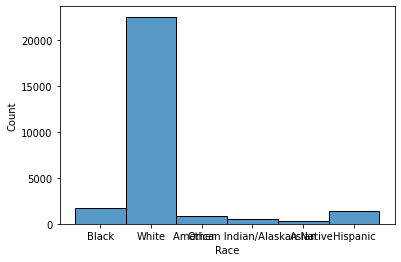

In [43]:
sns.histplot(x=df['Race'].where(df['HeartDisease']=='Yes'))

<AxesSubplot:xlabel='Race', ylabel='Count'>

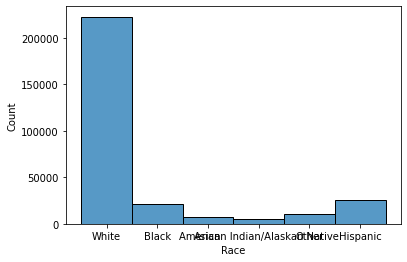

In [44]:
sns.histplot(x=df['Race'].where(df['HeartDisease']=='No'))

### Gen Health Distribution

In [45]:
gen =  df['GenHealth'].unique()
gen

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [46]:
gen_cnt = df['GenHealth'].value_counts()
gen_cnt

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

<AxesSubplot:xlabel='GenHealth'>

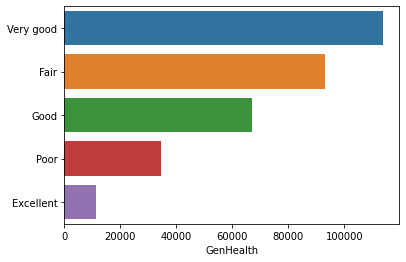

In [47]:
sns.barplot(x=gen_cnt,y=gen,data=df)

### Asthma Distribution based on Gender

<AxesSubplot:xlabel='Sex', ylabel='Count'>

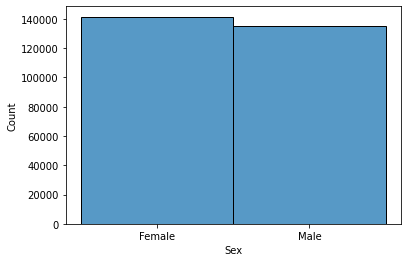

In [48]:
sns.histplot(x=df['Sex'].where(df['Asthma']=='No'))

<AxesSubplot:xlabel='Sex', ylabel='Count'>

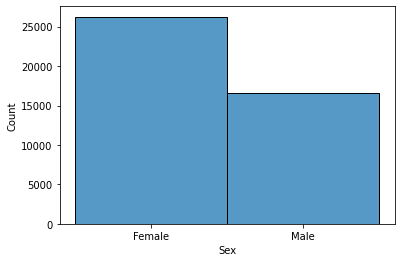

In [49]:
sns.histplot(x=df['Sex'].where(df['Asthma']=='Yes'))

## Data Cleaning


### Check for Missing Data

In [50]:
print(df.isnull().sum().sort_values(ascending=False))

HeartDisease        0
BMI                 0
KidneyDisease       0
Asthma              0
SleepTime           0
GenHealth           0
PhysicalActivity    0
Diabetic            0
Race                0
AgeCategory         0
Sex                 0
DiffWalking         0
MentalHealth        0
PhysicalHealth      0
Stroke              0
AlcoholDrinking     0
Smoking             0
SkinCancer          0
dtype: int64


In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Handle object Datatype


### Encoding Binary Categorical 

In [52]:
df['Smoking'] = pd.Series(np.where(df['Smoking'] == 'Yes', 1, 0))
df['AlcoholDrinking'] = pd.Series(np.where(df['AlcoholDrinking'] == 'Yes', 1, 0))
df['Stroke'] = pd.Series(np.where(df['Stroke'] == 'Yes', 1, 0))
df['DiffWalking'] = pd.Series(np.where(df['DiffWalking'] == 'Yes', 1, 0))
df['PhysicalActivity'] = pd.Series(np.where(df['PhysicalActivity'] == 'Yes', 1, 0))
df['Asthma'] = pd.Series(np.where(df['Asthma'] == 'Yes', 1, 0))
df['KidneyDisease'] = pd.Series(np.where(df['KidneyDisease'] == 'Yes', 1, 0))
df['SkinCancer'] = pd.Series(np.where(df['SkinCancer'] == 'Yes', 1, 0))
df['HeartDisease'] = pd.Series(np.where(df['HeartDisease'] == 'Yes', 1, 0))

### Encoding Categorical with more than 2 values

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['AgeCategory']=le.fit_transform(df['AgeCategory'])
df['Race']=le.fit_transform(df['Race'])
df['Diabetic']=le.fit_transform(df['Diabetic'])
df['GenHealth']=le.fit_transform(df['GenHealth'])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

## Data Visualization


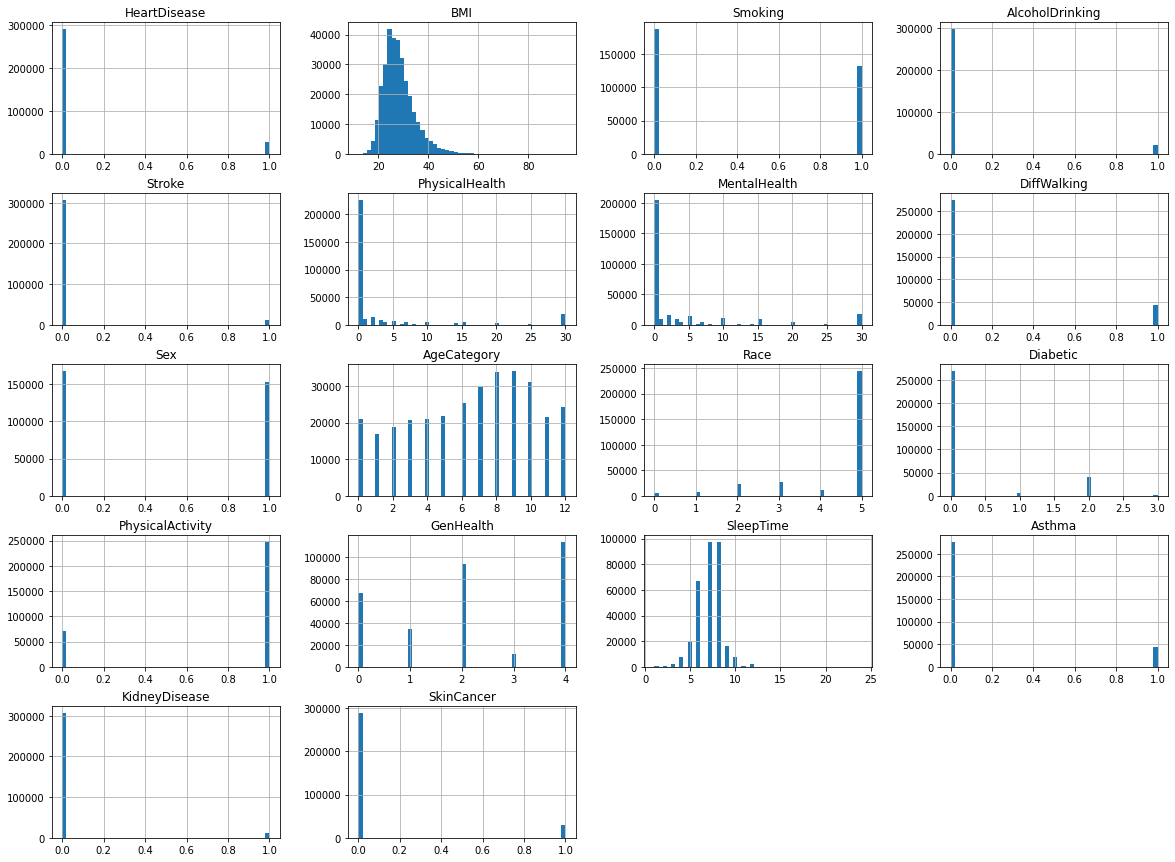

In [55]:
# Histogram
df.hist(bins=50, figsize=(20,15))
plt.show()

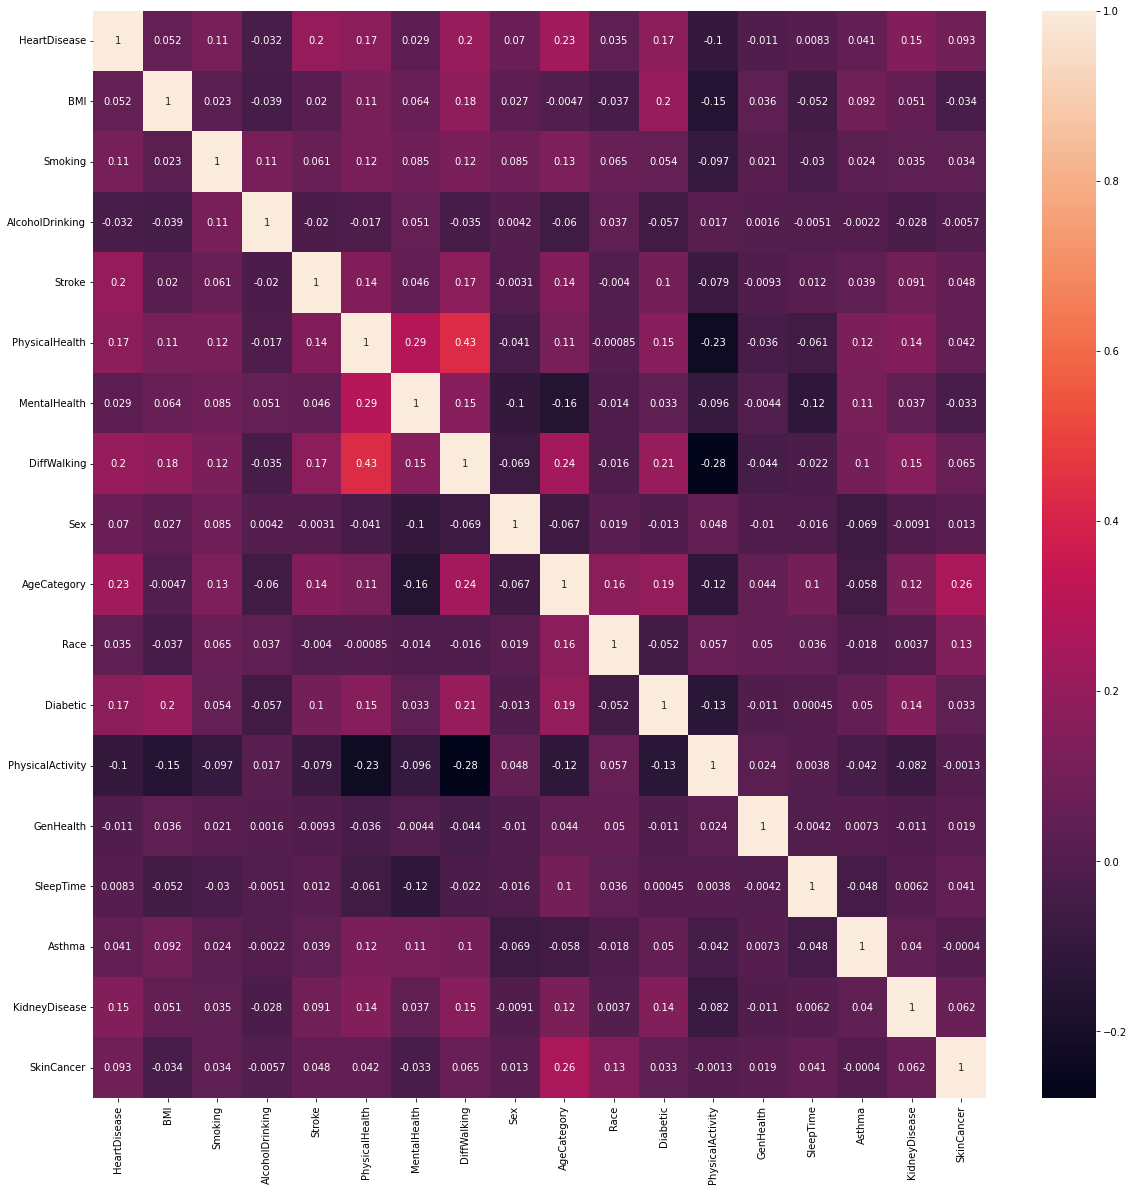

In [56]:
# Heatmap
corr_matrix = df.corr()
plt.figure(figsize = (20,20))
sns_plot=sns.heatmap(corr_matrix,annot=True)
plt.show()

In [57]:
df.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,-0.037424,0.202472,-0.150616,0.035932,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,-0.000847,0.151361,-0.232283,-0.035703,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,-0.014491,0.032945,-0.095808,-0.004412,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,0.104953,-0.058108,0.123190,0.263537


### Remove unnecessary columns


In [58]:
df.columns


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [59]:
df.drop(['AlcoholDrinking','PhysicalActivity','GenHealth', 'SleepTime'],axis=1,inplace=True)


In [60]:
df.corr()

,HeartDisease,BMI,Smoking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,0.034854,0.168553,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,-0.037424,0.202472,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,0.065499,0.053847,0.024149,0.034920,0.033977
Stroke,0.196835,0.019733,0.061226,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.003956,0.101518,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,-0.000847,0.151361,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,-0.014491,0.032945,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,-0.015831,0.205502,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,0.018855,-0.013456,-0.069191,-0.009084,0.013434
AgeCategory,0.233432,-0.004744,0.128331,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.058108,0.123190,0.263537
Race,0.034854,-0.037424,0.065499,-0.003956,-0.000847,-0.014491,-0.015831,0.018855,0.163090,1.000000,-0.052216,-0.017975,0.003709,0.134780


In [61]:
df.shape

(319795, 14)

### Data Splitting 

In [62]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']
print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (319795, 13) 
 y_shape: (319795,)


### Check Imbalanced Classes

In [63]:
y.value_counts() 

0    292422
1     27373
Name: HeartDisease, dtype: int64

#### Random Over-Sampling to deal with Imbalanced Data


In [65]:
from imblearn.over_sampling  import RandomOverSampler
smote = RandomOverSampler(sampling_strategy=1)
X_smote, y_smote = smote.fit_resample(X,y)

In [66]:
print(f' X_shape: {X_smote.shape} \n y_shape: {y_smote.shape}')

 X_shape: (584844, 13) 
 y_shape: (584844,)


In [67]:
y_smote.value_counts() 

0    292422
1    292422
Name: HeartDisease, dtype: int64

### Data Standardization

In [68]:
# Without Oversampling
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X = scl.fit_transform(X)

In [69]:
# with Oversampling
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X_smote = scl.fit_transform(X_smote)

### data Splitting into train and test

In [70]:
# Without Oversampling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=0)
print(f' X_train: {X_train.shape} & X_test: {X_test.shape}')
print(f' y_train: {y_train.shape} & y_test: {y_test.shape}')

 X_train: (255836, 13) & X_test: (63959, 13)
 y_train: (255836,) & y_test: (63959,)


In [71]:
# With Oversampling
from sklearn.model_selection import train_test_split
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_smote,y_smote,test_size=0.20,shuffle=True,random_state=0)
print(f' X_train: {X_train_res.shape} & X_test: {X_test_res.shape}')
print(f' y_train: {y_train_res.shape} & y_test: {y_test_res.shape}')

 X_train: (467875, 13) & X_test: (116969, 13)
 y_train: (467875,) & y_test: (116969,)


## Model Selection


### RandomForest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf_clf = RandomForestClassifier(criterion='entropy',n_estimators=20)

rf_clf.fit(X_train, y_train)
y_pred_test = rf_clf.predict(X_test)
y_pred_train = rf_clf.predict(X_train)

In [78]:
rf_clf_res = RandomForestClassifier(criterion='entropy',n_estimators=20)

rf_clf_res.fit(X_train_res, y_train_res)
y_pred_test_res = rf_clf_res.predict(X_test_res)
y_pred_train_res = rf_clf_res.predict(X_train_res)

In [79]:
print('Accuracy of Train befor Oversampling: {}'.format(accuracy_score(y_train, y_pred_train)*100))
print('Accuracy of  Test befor Oversampling: {}'.format(accuracy_score(y_test,y_pred_test)*100))
print('********************************************************')
print('Accuracy of Train after Oversampling: {}'.format(accuracy_score(y_train_res,y_pred_train_res)*100))
print('Accuracy of Test after Oversampling: {}'.format(accuracy_score(y_test_res,y_pred_test_res)*100))

Accuracy of Train befor Oversampling: 98.05813099016557
Accuracy of  Test befor Oversampling: 89.78564392814147
********************************************************
Accuracy of Train after Oversampling: 96.91627037135987
Accuracy of Test after Oversampling: 93.68123177936035


### Applying k-Fold Cross Validation

In [80]:
from sklearn.model_selection import cross_val_score
rf_clf_results = cross_val_score(estimator = rf_clf, X = X_train, y = y_train, cv = 5)
rf_clf_results_res = cross_val_score(estimator = rf_clf_res, X = X_train_res, y = y_train_res, cv = 5)

rf_clf_pred = rf_clf.predict(X_test)
rf_clf_res_pred = rf_clf_res.predict(X_test_res)


print("Validation score befor Oversampling: %.5f%% (%.5f%%)" % (rf_clf_results.mean()*100.0, rf_clf_results.std()*100.0))
print("Validation score after Oversampling: %.5f%% (%.5f%%)" % (rf_clf_results_res.mean()*100.0, rf_clf_results_res.std()*100.0))
print('********************************************************')

print('Accuracy score of Test  befor Oversampling: {}'.format(accuracy_score(y_test,rf_clf_pred)*100))
print('Accuracy score of Test after Oversampling: {}'.format(accuracy_score(y_test_res,rf_clf_res_pred)*100))

Validation score befor Oversampling: 89.76845% (0.05793%)
Validation score after Oversampling: 92.81432% (0.08260%)
********************************************************
Accuracy score of Test  befor Oversampling: 89.78564392814147
Accuracy score of Test after Oversampling: 93.68123177936035


### Model Evaluation 


In [84]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_res, y_pred_test_res))

[[52156  6305]
 [ 1086 57422]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


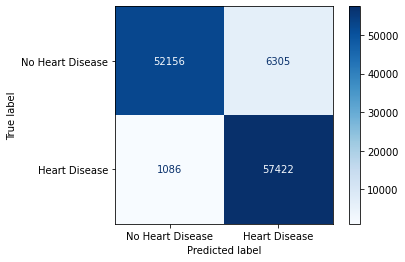

In [85]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(rf_clf_res, X_test_res, y_test_res,
                              display_labels=['No Heart Disease','Heart Disease'],
                              cmap=plt.cm.Blues)

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test_res, y_pred_test_res))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93     58461
           1       0.90      0.98      0.94     58508

    accuracy                           0.94    116969
   macro avg       0.94      0.94      0.94    116969
weighted avg       0.94      0.94      0.94    116969



### XGB Classifier

In [111]:
import xgboost as xgb
from scipy import stats 
from sklearn.model_selection import RandomizedSearchCV

xgb_clf = xgb.XGBClassifier( objective = 'binary:logistic',
                            base_score=0.5, 
                            booster='gbtree',
                            reg_alpha=0, 
                            reg_lambda=1,
                            n_estimators=300,
                            learning_rate=0.5
                           )
xgb_clf.fit(X_train_res, y_train_res)
xgb_clf_pred = xgb_clf.predict(X_test_res)


In [105]:
xgb_clf.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)>

In [112]:
print('Accuracy score of Test after Oversampling: {}'.format(accuracy_score(y_test_res,xgb_clf_pred)*100))

Accuracy score of Test after Oversampling: 80.60426266788636


In [115]:
print(confusion_matrix(y_test_res, xgb_clf_pred))

[[44447 14014]
 [ 8673 49835]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


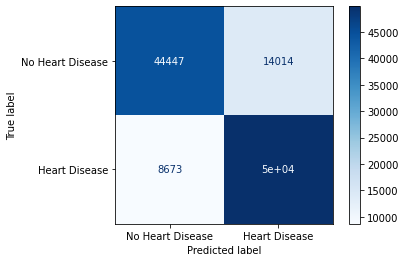

In [113]:
disp = plot_confusion_matrix(xgb_clf, X_test_res, y_test_res,
                              display_labels=['No Heart Disease','Heart Disease'],
                              cmap=plt.cm.Blues)

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test_res, xgb_clf_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80     58461
           1       0.78      0.85      0.81     58508

    accuracy                           0.81    116969
   macro avg       0.81      0.81      0.81    116969
weighted avg       0.81      0.81      0.81    116969



### Voting Classifier


In [120]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier([('rf',rf_clf_res),('xgb',xgb_clf)],verbose=True)
voting_clf.fit(X_train_res,y_train_res)
voting_clf_results = cross_val_score(estimator = voting_clf, X = X_train_res, y = y_train_res, cv = 5)
voting_clf_pred = voting_clf.predict(X_test_res)

[Voting] ....................... (1 of 2) Processing rf, total=  10.3s
[Voting] ...................... (2 of 2) Processing xgb, total= 1.0min
[Voting] ....................... (1 of 2) Processing rf, total=   8.7s
[Voting] ...................... (2 of 2) Processing xgb, total=  49.4s
[Voting] ....................... (1 of 2) Processing rf, total=   9.1s
[Voting] ...................... (2 of 2) Processing xgb, total=  49.5s
[Voting] ....................... (1 of 2) Processing rf, total=   9.1s
[Voting] ...................... (2 of 2) Processing xgb, total=  49.1s
[Voting] ....................... (1 of 2) Processing rf, total=   8.0s
[Voting] ...................... (2 of 2) Processing xgb, total=  49.5s
[Voting] ....................... (1 of 2) Processing rf, total=   8.2s
[Voting] ...................... (2 of 2) Processing xgb, total=  49.6s


In [121]:
print("Validation score after Oversampling: %.5f%% (%.5f%%)" % (voting_clf_results.mean()*100.0, voting_clf_results.std()*100.0))
print('Accuracy score of Test after Oversampling: {}'.format(accuracy_score(y_test_res,voting_clf_pred)*100))

Validation score after Oversampling: 88.02843% (0.14255%)
Accuracy score of Test after Oversampling: 88.677341859809


In [122]:
print(confusion_matrix(y_test_res, voting_clf_pred))

[[54190  4271]
 [ 8973 49535]]


In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test_res, voting_clf_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     58461
           1       0.92      0.85      0.88     58508

    accuracy                           0.89    116969
   macro avg       0.89      0.89      0.89    116969
weighted avg       0.89      0.89      0.89    116969



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


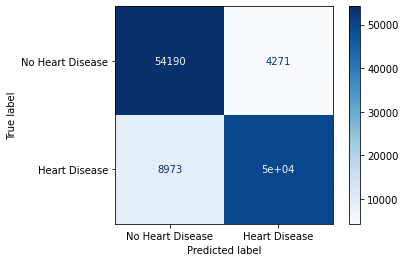

In [124]:
disp = plot_confusion_matrix(voting_clf, X_test_res, y_test_res,
                              display_labels=['No Heart Disease','Heart Disease'],
                              cmap=plt.cm.Blues)

In [126]:
rf = accuracy_score(y_test_res,rf_clf_res_pred)*100
xgb = accuracy_score(y_test_res,xgb_clf_pred)*100
voting = accuracy_score(y_test_res,voting_clf_pred)*100

scores = [rf,xgb,voting]
labels = ['Random Forest Classifier', 'XGB Classifier', 'Voting Classifier']
accs = {'Accuracy': scores}
df = pd.DataFrame(accs,index=labels)
df

,Accuracy
Random Forest Classifier,93.681232
XGB Classifier,80.604263
Voting Classifier,88.677342


## Upvote if you like it. Thank you.